# Occupancy Classifier

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/IDS Project/datatesting.csv')


In [4]:
data.shape

(20560, 7)

In [5]:
data

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,04-02-2015 17:51,23.180,27.2720,426.00,721.25,0.004793,1
1,04-02-2015 17:51,23.150,27.2675,429.50,714.00,0.004783,1
2,04-02-2015 17:53,23.150,27.2450,426.00,713.50,0.004779,1
3,04-02-2015 17:54,23.150,27.2000,426.00,708.25,0.004772,1
4,04-02-2015 17:55,23.100,27.2000,426.00,704.50,0.004757,1
...,...,...,...,...,...,...,...
20555,18-02-2015 09:15,20.815,27.7175,429.75,1505.25,0.004213,1
20556,18-02-2015 09:16,20.865,27.7450,423.50,1514.50,0.004230,1
20557,18-02-2015 09:16,20.890,27.7450,423.50,1521.50,0.004237,1
20558,18-02-2015 09:17,20.890,28.0225,418.75,1632.00,0.004279,1


In [6]:
data = data.drop(columns=['date'])

In [7]:
data['Occupancy'].value_counts()

0    15810
1     4750
Name: Occupancy, dtype: int64

In [8]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [9]:
data.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Light'}>,
        <Axes: title={'center': 'CO2'}>],
       [<Axes: title={'center': 'HumidityRatio'}>,
        <Axes: title={'center': 'Occupancy'}>]], dtype=object)

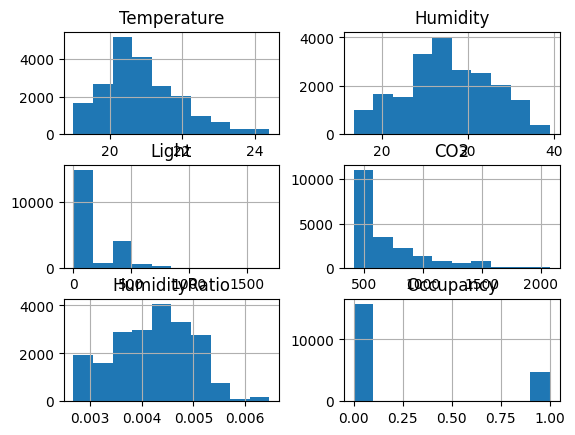

In [10]:
data.hist()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Light', ylabel='Occupancy'>

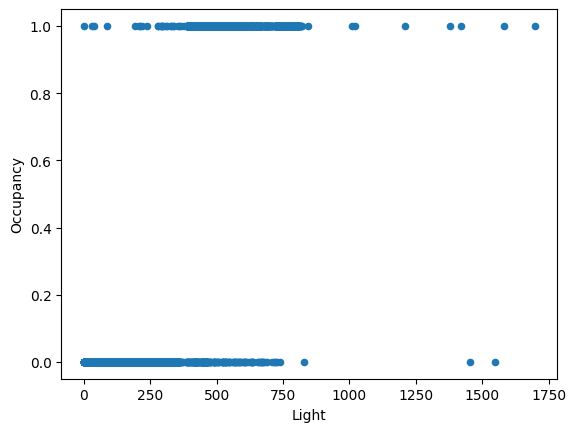

In [11]:
data.plot.scatter(y='Occupancy',x='Light')

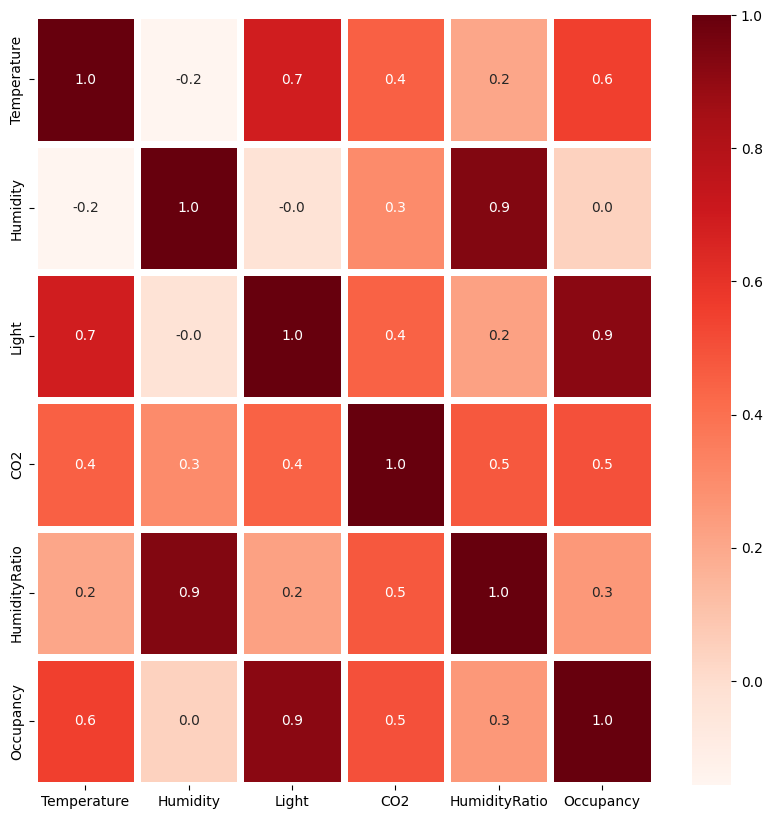

In [12]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax, cmap='Reds')
plt.show()

In [13]:
Train, Test = TTS(data, test_size = 0.2, random_state = 4)

In [14]:
Train.shape

(16448, 6)

In [15]:
Test.shape

(4112, 6)

In [16]:
X_train = Train.drop(columns=['Occupancy'])

In [17]:
Y_train = Train['Occupancy']
X_test = Test.drop(columns=['Occupancy'])
Y_test = Test['Occupancy']

In [18]:
X_train

,Temperature,Humidity,Light,CO2,HumidityRatio
13318,21.200,25.200,19.0,519.00,0.003920
18734,19.890,30.500,0.0,722.00,0.004380
6215,19.500,27.290,0.0,465.00,0.003821
10046,20.945,25.890,0.0,596.50,0.003965
18596,20.200,30.390,0.0,711.00,0.004449
...,...,...,...,...,...
16840,20.390,32.790,0.0,657.00,0.004860
11863,20.575,21.995,24.0,836.25,0.003289
17093,20.200,29.890,0.0,727.50,0.004375
8366,22.390,24.912,418.6,782.80,0.004169


In [19]:
Y_train

13318    0
18734    0
6215     0
10046    0
18596    0
        ..
16840    0
11863    0
17093    0
8366     1
17530    0
Name: Occupancy, Length: 16448, dtype: int64

In [20]:
scale = MinMaxScaler()
X_train_s = scale.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train_s,index=X_train.index,columns=X_train.columns)


In [21]:
X_test_s = scale.transform(X_test.values)
X_test = pd.DataFrame(X_test_s,index=X_test.index,columns=X_test.columns)

In [22]:
X_train

,Temperature,Humidity,Light,CO2,HumidityRatio
13318,0.406780,0.371567,0.012018,0.063862,0.329030
18734,0.164561,0.604483,0.000000,0.185875,0.450330
6215,0.092450,0.463415,0.000000,0.031405,0.302964
10046,0.359630,0.401890,0.000000,0.110443,0.340918
18596,0.221880,0.599648,0.000000,0.179264,0.468622
...,...,...,...,...,...
16840,0.257011,0.705120,0.000000,0.146807,0.577208
11863,0.291217,0.230719,0.015180,0.254545,0.162421
17093,0.221880,0.577675,0.000000,0.189181,0.449158
8366,0.626810,0.358910,0.264769,0.222419,0.394805


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Light'}>,
        <Axes: title={'center': 'CO2'}>],
       [<Axes: title={'center': 'HumidityRatio'}>, <Axes: >]],
      dtype=object)

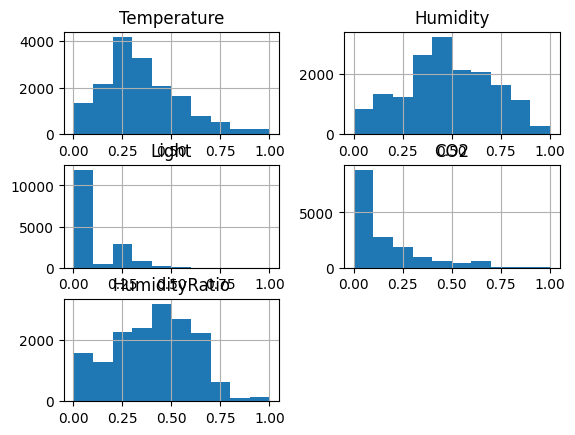

In [23]:
X_train.hist()

<Axes: ylabel='Occupancy'>

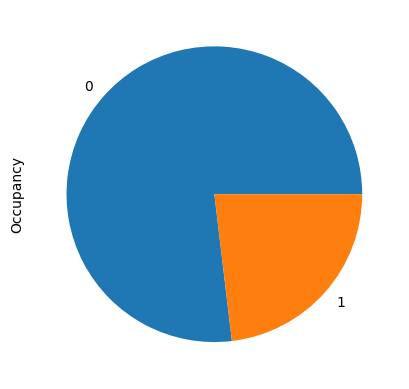

In [24]:
data['Occupancy'].value_counts().plot(kind='pie')

<Axes: ylabel='Occupancy'>

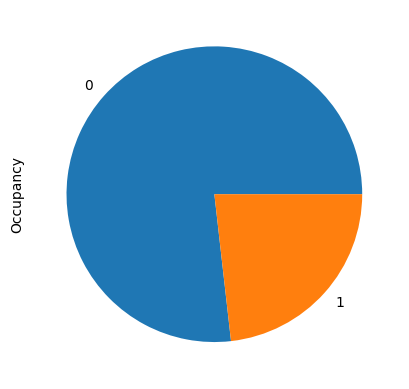

In [25]:
Y_train.value_counts().plot(kind='pie')

<Axes: ylabel='Occupancy'>

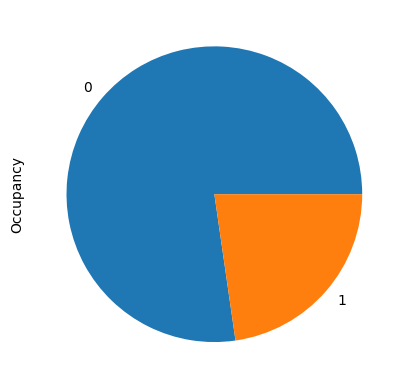

In [26]:
Y_test.value_counts().plot(kind='pie')

[0.15254771 0.0340776  0.62081263 0.15300396 0.03955811]


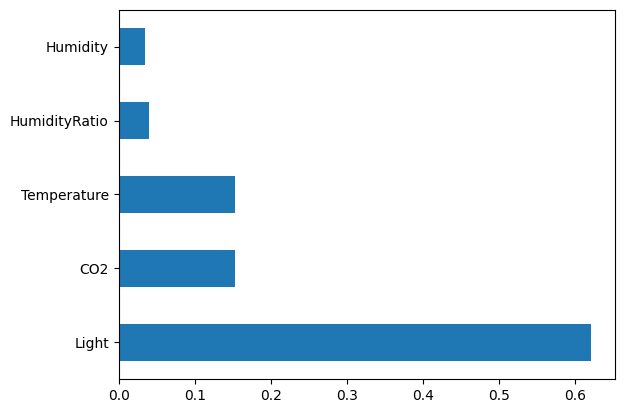

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_,index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
X_train = X_train.drop(columns=['Humidity','HumidityRatio'])
X_test = X_test.drop(columns=['Humidity','HumidityRatio'])

Accuracy: 0.985895
Precision: 0.986467
Recall: 0.985895


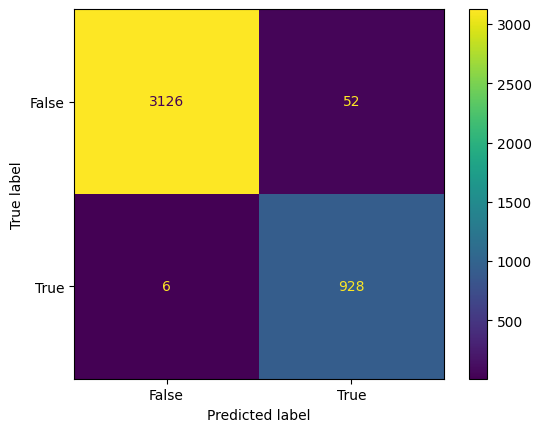

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
model = LogisticRegression()
model.fit(X_train,Y_train)
x_test_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test,x_test_pred)
test_pre = precision_score(Y_test,x_test_pred,average='weighted')
test_rec = recall_score(Y_test,x_test_pred,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
confusion_mat = confusion_matrix(Y_test,x_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.985652
Precision: 0.986247
Recall: 0.985652


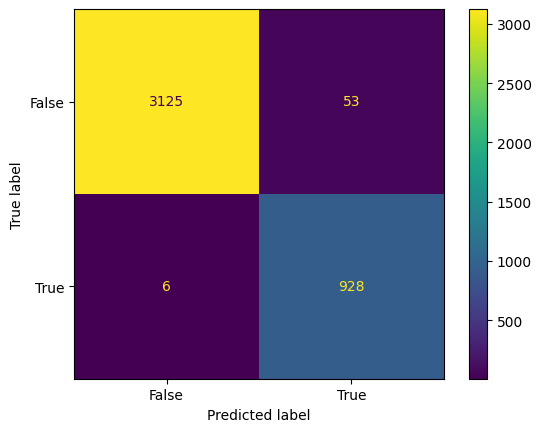

In [30]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
test_acc = accuracy_score(Y_test,Y_pred)
test_pre = precision_score(Y_test,Y_pred,average='weighted')
test_rec = recall_score(Y_test,Y_pred,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
confusion_mat = confusion_matrix(Y_test,Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.962792
Precision: 0.967820
Recall: 0.962792


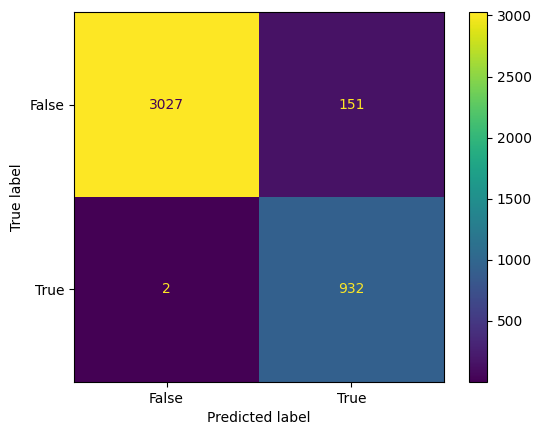

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred_nb = gnb.predict(X_test)
test_acc = accuracy_score(Y_test,Y_pred_nb)
test_pre = precision_score(Y_test,Y_pred_nb,average='weighted')
test_rec = recall_score(Y_test,Y_pred_nb,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
confusion_mat = confusion_matrix(Y_test,Y_pred_nb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.986138
Precision: 0.986614
Recall: 0.986138


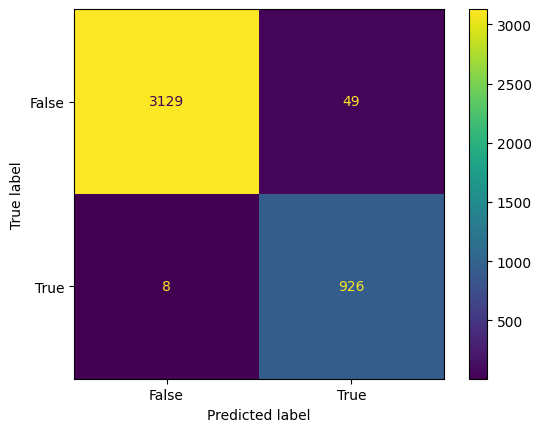

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf_r = RandomForestClassifier(max_depth=4, random_state=0)
clf_r.fit(X_train,Y_train)
Y_pred_rf = clf_r.predict(X_test) 
test_acc = accuracy_score(Y_test,Y_pred_rf)
test_pre = precision_score(Y_test,Y_pred_rf,average='weighted')
test_rec = recall_score(Y_test,Y_pred_rf,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
confusion_mat = confusion_matrix(Y_test,Y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.986868
Precision: 0.987030
Recall: 0.986868


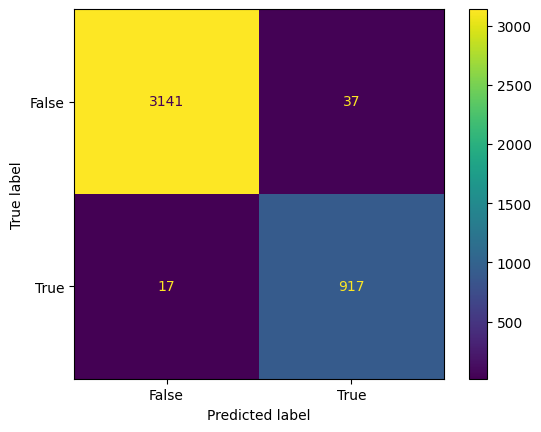

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,Y_train)
Y_pred_KNN = model.predict(X_test)
test_acc = accuracy_score(Y_test,Y_pred_KNN)
test_pre = precision_score(Y_test,Y_pred_KNN,average='weighted')
test_rec = recall_score(Y_test,Y_pred_KNN,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
confusion_mat = confusion_matrix(Y_test,Y_pred_KNN)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.989543
Precision: 0.989676
Recall: 0.989543


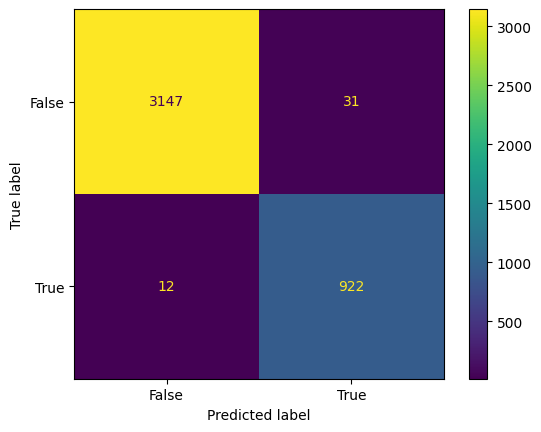

In [34]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
model.fit(X_train,Y_train)
Y_pred_boost = model.predict(X_test)
test_acc = accuracy_score(Y_test,Y_pred_boost)
test_pre = precision_score(Y_test,Y_pred_boost,average='weighted')
test_rec = recall_score(Y_test,Y_pred_boost,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
confusion_mat = confusion_matrix(Y_test,Y_pred_boost)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.985409
Precision: 0.985989
Recall: 0.985409


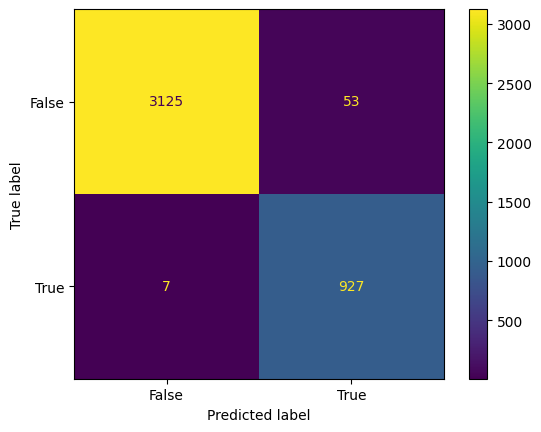

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=SVC(),n_estimators=10,random_state=0)
model.fit(X_train,Y_train)
Y_pred_bag = model.predict(X_test)
test_acc = accuracy_score(Y_test,Y_pred_bag)
test_pre = precision_score(Y_test,Y_pred_bag,average='weighted')
test_rec = recall_score(Y_test,Y_pred_bag,average='weighted')
print("Accuracy: {:f}".format(test_acc))
print("Precision: {:f}".format(test_pre))
print("Recall: {:f}".format(test_rec))
confusion_mat = confusion_matrix(Y_test,Y_pred_bag)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])
cm_display.plot()
plt.show()